<a href="https://colab.research.google.com/github/iamafifaah/Google-Colab/blob/main/Stacking_Layer_Rasterio_vs_GDAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install rasterio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 106.2 MB/s eta 0:00:00


In [2]:
pip install pyspatialml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 37.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 48.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 92.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 111.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: geopandas
    Found existing installation: geopandas 1.1.1
    Uninstalling geopandas-1.1.1:
      Successfully uninstalled geopandas-1.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0

In [1]:
from pyspatialml import Raster
import os
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
import rasterio.plot
import numpy as np
import matplotlib as mpl
import geopandas as gpd
import numpy as np
from tempfile import NamedTemporaryFile
import warnings
warnings.filterwarnings('ignore')

In [2]:
from osgeo import gdal
import os
import glob
import matplotlib.pyplot as plt
from rasterio.plot import show
import rasterio.mask

In [3]:
import glob

#------------------------------- Stack Layer with Different Extent -------------------------------

In [4]:
!pwd

/content


## Glob

In [5]:
raster_list = glob.glob('/content/raster/*.tif')

In [6]:
type(raster_list)

list

In [7]:
print(raster_list)

['/content/raster/NDBI.tif', '/content/raster/sexratio.tif', '/content/raster/popdensity.tif', '/content/raster/nightlight.tif', '/content/raster/dissriver.tif', '/content/raster/slope.tif', '/content/raster/topografi.tif', '/content/raster/twi.tif', '/content/raster/MNDWI.tif', '/content/raster/NDWI.tif', '/content/raster/rainfall.tif', '/content/raster/disschannel.tif', '/content/raster/land_cover.tif']


In [25]:
stack = Raster(raster_list)

In [71]:
stack.names

dict_keys(['NDBI', 'sexratio', 'popdensity', 'nightlight', 'dissriver', 'slope', 'topografi', 'twi', 'MNDWI', 'NDWI', 'rainfall', 'disschannel', 'land_cover'])

In [27]:
for predictor_path in raster_list:
    try:
        with rasterio.open(f'/content/raster/{predictor_path}') as src:
            print(f"File: {predictor_path}")
            print(f"  Shape: {src.shape}")
            print(f"  Bounds (coordinates): {src.bounds}")
            print("-" * 20)
    except rasterio.errors.RasterioIOError as e:
        print(f"Error opening file {predictor_path}: {e}")

Error opening file /content/raster/NDBI.tif: /content/raster//content/raster/NDBI.tif: No such file or directory
Error opening file /content/raster/sexratio.tif: /content/raster//content/raster/sexratio.tif: No such file or directory
Error opening file /content/raster/popdensity.tif: /content/raster//content/raster/popdensity.tif: No such file or directory
Error opening file /content/raster/nightlight.tif: /content/raster//content/raster/nightlight.tif: No such file or directory
Error opening file /content/raster/dissriver.tif: /content/raster//content/raster/dissriver.tif: No such file or directory
Error opening file /content/raster/slope.tif: /content/raster//content/raster/slope.tif: No such file or directory
Error opening file /content/raster/topografi.tif: /content/raster//content/raster/topografi.tif: No such file or directory
Error opening file /content/raster/twi.tif: /content/raster//content/raster/twi.tif: No such file or directory
Error opening file /content/raster/MNDWI.tif

## Rasterio

In [54]:
lulc = rasterio.open('/content/raster/land_cover.tif')
mndwi = rasterio.open('/content/raster/MNDWI.tif')
ndbi = rasterio.open('/content/raster/NDBI.tif')
ndwi = rasterio.open('/content/raster/NDWI.tif')
nightlight = rasterio.open('/content/raster/nightlight.tif')
dissriver = rasterio.open('/content/raster/dissriver.tif')
dissriver = rasterio.open('/content/raster/disschannel.tif')
slope = rasterio.open('/content/raster/slope.tif')
topografi = rasterio.open('/content/raster/topografi.tif')
popdensity = rasterio.open('/content/raster/popdensity.tif')
sexratio = rasterio.open('/content/raster/sexratio.tif')
twi = rasterio.open('/content/raster/twi.tif')

In [65]:
predictors = ['land_cover.tif','MNDWI.tif','NDBI.tif','NDWI.tif','nightlight.tif','dissriver.tif','disschannel.tif','slope.tif','topografi.tif','popdensity.tif','sexratio.tif','twi.tif']

In [66]:
for predictor_path in predictors:
    try:
        with rasterio.open(f'/content/raster/{predictor_path}') as src:
            print(f"File: {predictor_path}")
            print(f"  Shape: {src.shape}")
            print(f"  Bounds (coordinates): {src.bounds}")
            print("-" * 20)
    except rasterio.errors.RasterioIOError as e:
        print(f"Error opening file {predictor_path}: {e}")

File: land_cover.tif
  Shape: (1042, 1058)
  Bounds (coordinates): BoundingBox(left=686571.647782931, bottom=9295415.820755921, right=718311.647782931, top=9326675.820755921)
--------------------
File: MNDWI.tif
  Shape: (1042, 1058)
  Bounds (coordinates): BoundingBox(left=686571.647782931, bottom=9295415.820755921, right=718311.647782931, top=9326675.820755921)
--------------------
File: NDBI.tif
  Shape: (1042, 1058)
  Bounds (coordinates): BoundingBox(left=686571.647782931, bottom=9295415.820755921, right=718311.647782931, top=9326675.820755921)
--------------------
File: NDWI.tif
  Shape: (1042, 1058)
  Bounds (coordinates): BoundingBox(left=686571.647782931, bottom=9295415.820755921, right=718311.647782931, top=9326675.820755921)
--------------------
File: nightlight.tif
  Shape: (1042, 1058)
  Bounds (coordinates): BoundingBox(left=686571.647782931, bottom=9295415.820755921, right=718311.647782931, top=9326675.820755921)
--------------------
File: dissriver.tif
  Shape: (1041, 1

In [67]:
type(predictors)

list

In [68]:
print(predictors)

['land_cover.tif', 'MNDWI.tif', 'NDBI.tif', 'NDWI.tif', 'nightlight.tif', 'dissriver.tif', 'disschannel.tif', 'slope.tif', 'topografi.tif', 'popdensity.tif', 'sexratio.tif', 'twi.tif']


In [45]:
type(lulc)

rasterio.io.DatasetReader

In [46]:
lulc.shape

(1042, 1058)

In [ ]:
mndwi.shape

(1042, 1058)

In [ ]:
ndbi.shape

(1042, 1058)

In [ ]:
ndwi.shape

(1042, 1058)

In [ ]:
nightlight.shape

(1042, 1058)

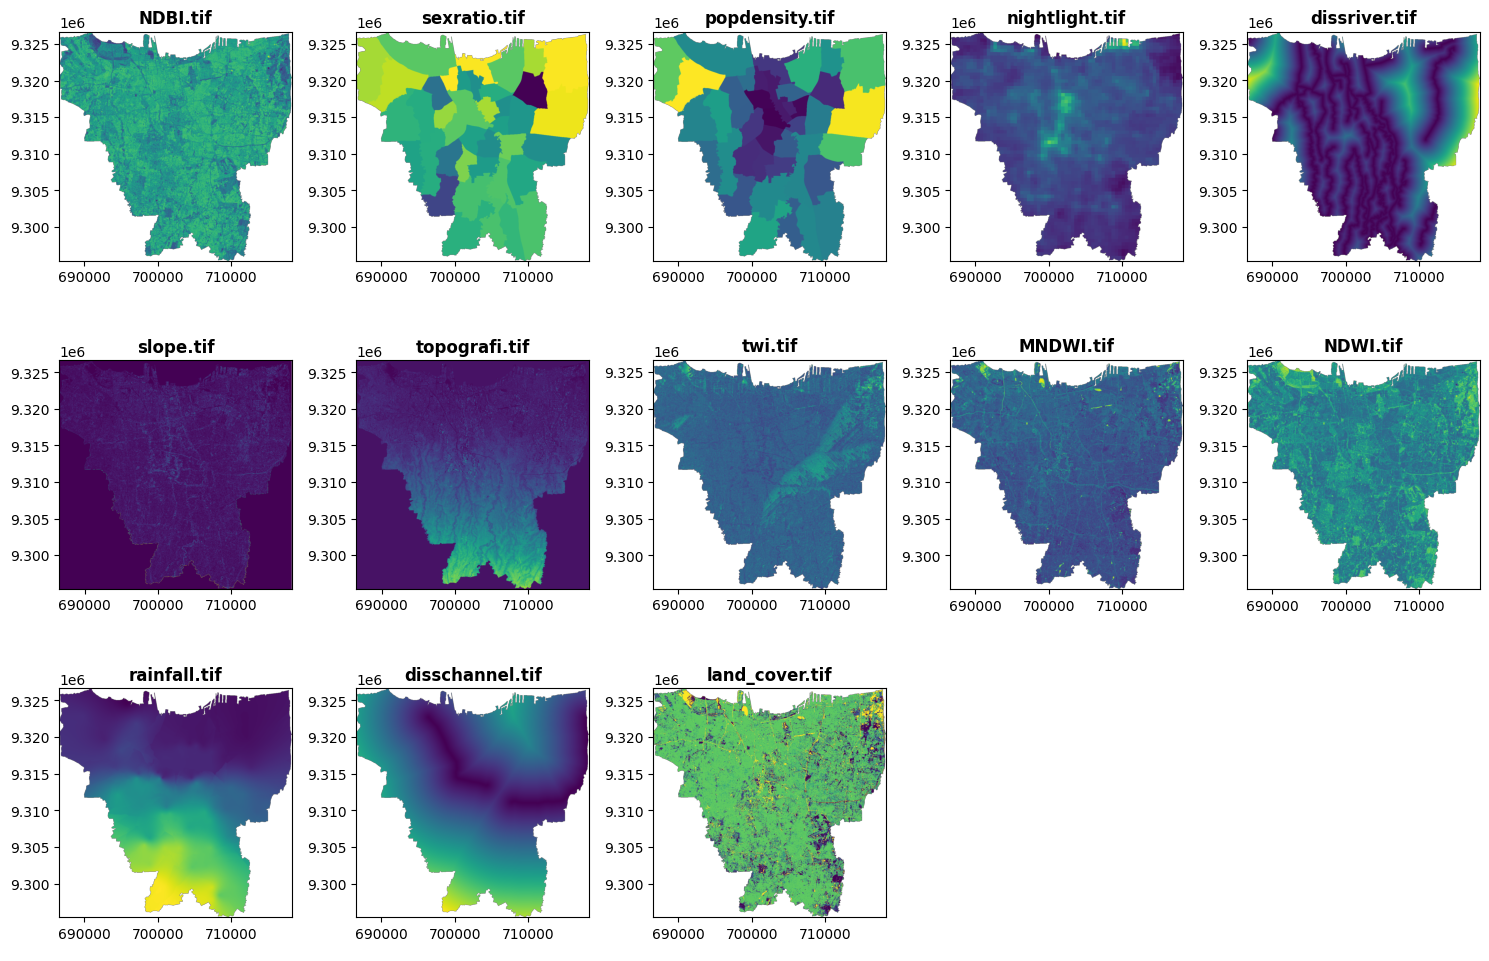

In [47]:
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt
# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(15, 10))

# Flatten axes agar bisa diakses satu per satu dengan index tunggal
axes = axes.flatten()

for i, path in enumerate(raster_list):
    with rasterio.open(path) as src:
        filename = os.path.basename(path)
        show(src, ax=axes[i], title=filename)

# Turn off empty subplots if any
for j in range(len(raster_list), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [48]:
print(raster_list)

['/content/raster/NDBI.tif', '/content/raster/sexratio.tif', '/content/raster/popdensity.tif', '/content/raster/nightlight.tif', '/content/raster/dissriver.tif', '/content/raster/slope.tif', '/content/raster/topografi.tif', '/content/raster/twi.tif', '/content/raster/MNDWI.tif', '/content/raster/NDWI.tif', '/content/raster/rainfall.tif', '/content/raster/disschannel.tif', '/content/raster/land_cover.tif']


In [70]:
# import rasterio
# from rasterio.plot import show
# import matplotlib.pyplot as plt
# # Create subplots
# fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(15, 10))

# # Flatten axes agar bisa diakses satu per satu dengan index tunggal
# axes = axes.flatten()

# # Turn off empty subplots if any
# for j in range(len(predictors), len(axes)):
#     axes[j].axis('off')

# plt.tight_layout()
# plt.show()

# 25th July 2025
with glob, can created raster stacked, on the other side rasterio open can't created list of predictors